<a href="https://colab.research.google.com/github/Nidjay78/LLM-Assisted-LSTM-Model/blob/main/LSTM_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from keras import losses, optimizers

In [ ]:
def download_stock_data(symbol, start_date, end_date):

    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [ ]:
stock_symbol = "AAPL"
start_date = "2013-01-01"
end_date = "2023-05-18"
sequence_length = 6
batch_size = 128
epochs = 35
validation_split = 0.2

In [ ]:
df = yf.download(stock_symbol, start=start_date, end=end_date)
df.drop(columns=['Adj Close', 'Volume'], inplace=True)
df['High'] /= 10000
df['Open'] /= 10000
df['Low'] /= 10000
df['Close'] /= 10000

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data = df.to_numpy()
result = []
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)
row = round(0.8 * result.shape[0])
from sklearn.model_selection import train_test_split


X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

amount_of_features = X_train.shape[1]
X_train = np.reshape(X_train, (X_train.shape[0], sequence_length, amount_of_features))
X_test = np.reshape(X_test, (X_test.shape[0], sequence_length, amount_of_features))


ValueError: ignored

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=x_train.shape[1:], return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
start = timer()
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=2,
    steps_per_epoch=len(x_train) // batch_size  # Increase this value
)
end = timer()
print(f"Training time: {end - start:.2f} seconds")

Epoch 1/35
3/3 - 6s - loss: 25367762624839680.0000 - mae: 144728336.0000 - val_loss: 6499060223574016.0000 - val_mae: 78149440.0000 - 6s/epoch - 2s/step
Epoch 2/35
3/3 - 0s - loss: 25367762624839680.0000 - mae: 144728336.0000 - val_loss: 6499060223574016.0000 - val_mae: 78149440.0000 - 54ms/epoch - 18ms/step
Epoch 3/35
3/3 - 0s - loss: 25367762624839680.0000 - mae: 144728336.0000 - val_loss: 6499060223574016.0000 - val_mae: 78149440.0000 - 49ms/epoch - 16ms/step
Epoch 4/35
3/3 - 0s - loss: 25367762624839680.0000 - mae: 144728336.0000 - val_loss: 6499060223574016.0000 - val_mae: 78149440.0000 - 70ms/epoch - 23ms/step
Epoch 5/35
3/3 - 0s - loss: 25367762624839680.0000 - mae: 144728336.0000 - val_loss: 6499060223574016.0000 - val_mae: 78149440.0000 - 65ms/epoch - 22ms/step
Epoch 6/35
3/3 - 0s - loss: 25367762624839680.0000 - mae: 144728336.0000 - val_loss: 6499060223574016.0000 - val_mae: 78149440.0000 - 52ms/epoch - 17ms/step
Epoch 7/35
3/3 - 0s - loss: 25367762624839680.0000 - mae: 1447

In [ ]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)


In [ ]:
y_pred = model.predict(x_test)

4/4 [==============================] - 1s 6ms/step


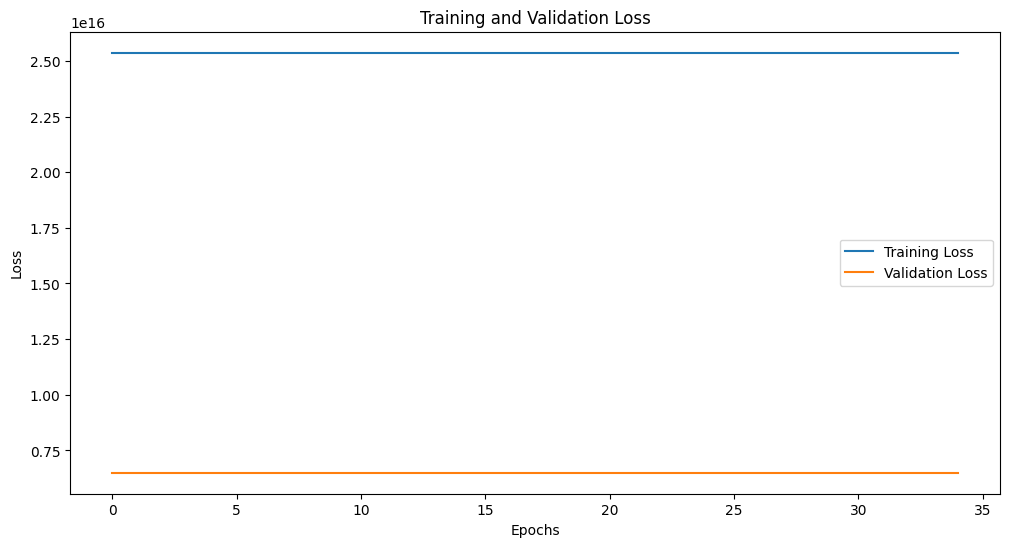

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

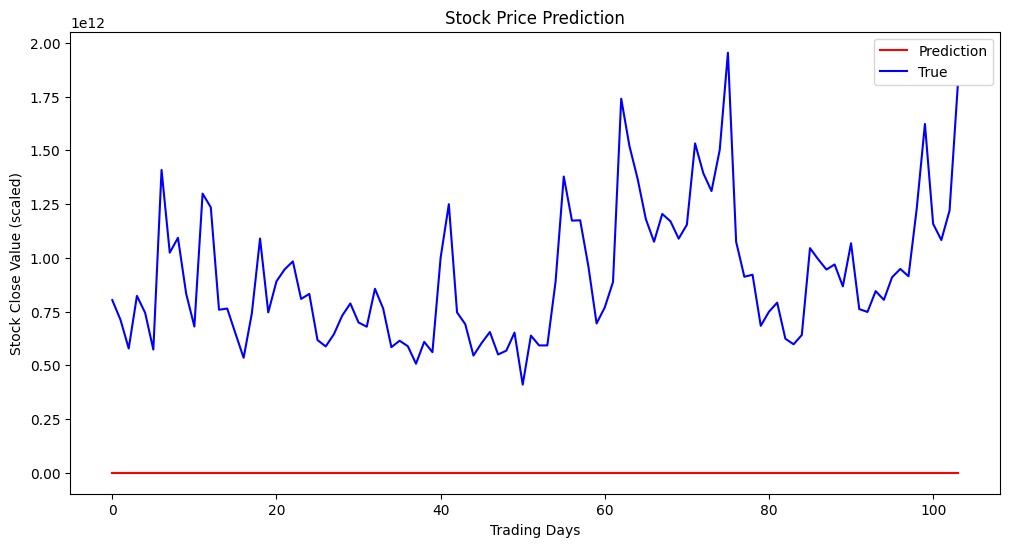

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred * 10000, color='red', label='Prediction')
plt.plot(y_test * 10000, color='blue', label='True')
plt.xlabel('Trading Days')
plt.ylabel('Stock Close Value (scaled)')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')

In [ ]:
def generate_signals(model, X_test):
    predictions = model.predict(X_test)
    signals = (predictions > 0.5).astype(int)  # Buy if the probability is greater than 0.5
    return signals